## Amazon Fine Food Reviews

### 1. About Dataset
- This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.
> Source: Kaggle

### 1.2 Data Includes: 
- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews

### 2. Business Problem:

#### 2.1 Problem Statement:
- Given a text review, classify its sentiment as either positive or negative.
- This task can be valuable for determining which products to remove from the Amazon store based on their overall sentiment scores. We will assign a positive sentiment to reviews with a score greater than 3 and a negative sentiment to those with a score less than 3. Reviews with a score of 3 will be considered neutral and excluded from the analysis.

#### 2.2 Real World/Business Objecives and Constraints
- The cost of misclassification can be high. For instance, if a product with overwhelmingly positive reviews is incorrectly labeled as negative and subsequently removed from the store, it could significantly impact Amazon's business growth by denying customers access to a popular product.

### 3. Machine Learning Problem
#### 3.1 Data
##### 3.1.1 Data Overview
- Data will be in a file <b> Reviews.csv </b>.
- Contains 10 columns.
- Size of csv file : 286 MB
- Number of rows in the dataset: 568,454

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
df= pd.read_csv("Reviews.csv")

##### 3.1.2 Example Data Point

In [3]:
print(df.head(1))

   Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   

                                                Text  
0  I have bought several of the Vitality canned d...  


##### 3.1.3 Performance Metric:
##### Metric(s):
- Log loss
- Binary Confusion Matrix

#### 3.2 Train and Test Construction
- We split the dataset into training and testing sets with a 70:30 ratio, respectively. This approach is suitable given the sufficient amount of available data.

### 4. Feature Explanation:
- Id- A unique identifier is assigned to each row in a dataset.
- ProductId- A unique product ID number is assigned to each distinct product.
- UserId- Customer ID is a unique identifier assigned to each customer in a database. 
- ProfileName - Customer Name is the specific name provided by a user when creating an Amazon account.
- HelpfulnessNumerator -Helpful votes is the metric that indicates the number of users who found a specific review helpful on a product. 
- HelpfulnessDenominator - This includes both the number of users who found the review helpful (HelpfulnessNumerator) and those who did not find it helpful.
> It's essential that HelpfulnessDenominator is greater than or equal to HelpfulnessNumerator to maintain data integrity and prevent any inconsistencies in the calculation of helpfulness percentage.
- Score: Product ratings are typically expressed on a 1-5 scale, with 1 being the lowest and 5 being the highest. For sentiment analysis purposes, ratings of 3 are often considered neutral and excluded from the dataset. This leaves ratings of 1 and 2 as negative sentiments and 4 and 5 as positive sentiments.
- Time- Unix timestamp is a numerical representation of a point in time, measured in seconds elapsed since January 1, 1970, 00:00:00 UTC. It's a standard format for storing and managing timestamps in computer systems.
- Summary - A review summary is a condensed version of a product review, capturing the main points and overall sentiment.
- Text: The text column contains the actual customer review itself. It's the raw, unstructured data that expresses the customer's opinion or experience with the product or service.

### 5. Exploratory Data Analysis
- Exploratory Data Analysis (EDA) is the process of understanding your data through visualization and summary statistics. It helps you discover patterns, trends, and anomalies before building models.

#### 5.1 Reading data and basic stats

In [4]:

print("Number of data points: ",df.shape[0])

Number of data points:  568454


In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### 5.2 Check for null values


In [6]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

- There are 26 data points missing profile names, and 27 data points missing summaries.
- Let's remove rows containing missing values.

In [7]:
df1 = df.dropna()

In [8]:
df1.shape

(568401, 10)

- The dataset now contains 568,401 rows after removing null values.
- We removed 53 rows containing missing values.

#### 5.3 Check for duplicates values
-We drop duplicate rows based on the combination of <b> UserId, HelpfulnessNumerator, HelpfulnessDenominator, Time, Summary, and Text </b>.

In [9]:
df1 = df1.drop_duplicates(subset={'UserId','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary','Text'},keep='first',inplace=False)

In [10]:
df1.shape

(396235, 10)

-The dataset now contains 396,235 data points after removing duplicates.

#### 5.4 Helpfulness Numerator <= Helpfullness Denominator
- Helpfulness Denominator is the total number of people who have rated a review as helpful or not helpful.
- If the HelpfulnessDenominator is less than the HelpfulnessNumerator, the data is inconsistent and should be dropped.










In [11]:
df1=df1[df1['HelpfulnessNumerator']<=df1['HelpfulnessDenominator']]

In [12]:
df1.shape

(396233, 10)

- We dropped two rows where the HelpfulnessNumerator was greater than the HelpfulnessDenominator.

#### 5.4 Remove rows with a score of 3.
- We are excluding reviews with a score of 3 from the dataset for our binary sentiment analysis.

In [13]:
df1 = df1[(df1['Score']<3) | (df['Score']>3)]

C:\Users\hatyy\AppData\Local\Temp\ipykernel_9704\4141656292.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df1['Score']<3) | (df['Score']>3)]


In [14]:
df1.shape

(366329, 10)

- The dataset now contains 366,329 rows after excluding reviews with a score of 3.

#### 5.5 Data Remains
- Let's calculate the percentage of data retained after the initial cleaning process.

In [15]:
remains = (df1.size*1.0/df.size*1.0)*100
print(remains)

64.44303320937138


- Let's round the percentage to two decimal places.

In [16]:
remains = round(remains,2)
print(remains, "% of data retained after the initial cleaning process")

64.44 % of data retained after the initial cleaning process


#### 5.5 Sentiment
- Create a new feature named 'Sentiment' with values 1 for positive (scores 4, 5) and 0 for negative (scores 1, 2).










In [17]:
df1['Sentiment']=df1['Score'].apply(lambda x: 0 if x<3 else 1)
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


#### 5.6 Value Counts
- Let's count the number of positive and negative reviews.

In [18]:
df1['Sentiment'].value_counts()

Sentiment
1    308628
0     57701
Name: count, dtype: int64

- There are 308,628 positive reviews and 57,701 negative reviews in the dataset.
- The dataset exhibits a class imbalance. There are significantly more positive reviews than negative ones.
- Due to the imbalance in the dataset, with significantly more positive reviews, the model is likely to be biased towards predicting the positive class. This can lead to inaccurate predictions for the minority class (negative reviews).
- We will address the class imbalance by assigning higher weights to the minority class during model training. This technique will help the model focus more on the underrepresented class.







  

#### 5.7 Feature  Elimination 
- Feature Elimination is the process of removing irrelevant or redundant features from a dataset to improve model performance and efficiency.
- For our sentiment analysis, we will only use the 'Text' and 'Sentiment' columns, discarding all other information.

In [19]:
df1.drop(['Id','UserId','Time','ProductId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Summary'],axis=1,inplace=True)

In [20]:
df1.head()

,Text,Sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


#### 6 . Text Preprocessing
##### 6.1 Removing HTML Tags

In [21]:
df1['clean_text']=df1['Text'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

C:\Users\hatyy\AppData\Local\Temp\ipykernel_9704\3021122911.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df1['clean_text']=df1['Text'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())


#### 6.2 Converting clean_text to lower text
> Converting words to lowercase during text preprocessing helps in:
- Treating variations as the same word: Words like "Apple", "apple", and "APPLE" will be considered the same, preventing the model from treating them as different entities.
- Reducing dimensionality: Lowercasing can potentially reduce the vocabulary size, leading to a smaller feature space.
- Simplifying calculations: Many text processing algorithms are case-sensitive, and converting to lowercase can streamline calculations.

In [22]:
df1['clean_text'] = df1['clean_text'].str.lower()

#### 6.2 Decontraction of words
- Decontraction is the process of expanding contracted words into their full forms.
- For example:

> "won't" becomes "will not"
> "can't" becomes "cannot"
> "I'm" becomes "I am"
- This step is often performed during text preprocessing to improve the accuracy of natural language processing tasks.

In [23]:
def decontraction (phrase):
    phrase = re.sub(r"won't","will not",phrase)
    phrase = re.sub(r"can\'t","can not",phrase)
    phrase = re.sub(r"didn\'t","did not",phrase)
    phrase = re.sub(r"haven\'t","have not",phrase)
    phrase = re.sub(r"hadn\'t","had not",phrase)
    
    phrase = re.sub(r"n\'t"," not",phrase)
    phrase = re.sub(r"\'re"," are",phrase)
    phrase = re.sub(r"\'s"," is",phrase)
    phrase = re.sub(r"\'ll"," will",phrase)
    phrase = re.sub(r"\'t"," not",phrase)
    phrase = re.sub(r"\'ve", " have",phrase)
    phrase = re.sub(r"\'m", " am",phrase)
    return phrase

- Example of text before applying decontraction:

In [24]:
df1['clean_text'].loc[568450]

"i'm disappointed with the flavor. the chocolate notes are especially weak. milk thickens it but the flavor still disappoints. this was worth a try but i'll never buy again. i will use what's left, which will be gone in no time thanks to the small cans."

In [25]:
df1['clean_text']= df1['clean_text'].apply(decontraction)

-Example of text after applying decontraction:

In [26]:
df1['clean_text'].loc[568450]

'i am disappointed with the flavor. the chocolate notes are especially weak. milk thickens it but the flavor still disappoints. this was worth a try but i will never buy again. i will use what is left, which will be gone in no time thanks to the small cans.'

#### 6.3 Removing numbers, special symbol, spaces and links
- These elements often don't contribute meaningful information to the text analysis and can introduce noise.

In [27]:
def rem_noise(phrase):
    phrase = re.sub(r'[^a-zA-Z\s]', '',phrase)
    phrase = re.sub(r'https\S+',"",phrase)
    return phrase

In [28]:
df1['clean_text'] = df1['clean_text'].apply(rem_noise)

- Example of text after applying rem_noise:

In [29]:
df1['clean_text'].loc[568450]

'i am disappointed with the flavor the chocolate notes are especially weak milk thickens it but the flavor still disappoints this was worth a try but i will never buy again i will use what is left which will be gone in no time thanks to the small cans'

#### 6.4 Word Tokenization
- Word tokenization splits text into individual words.

In [30]:
from nltk.tokenize import word_tokenize
df1['clean_text']=df1['clean_text'].apply(word_tokenize)

In [31]:
df1.head()

,Text,Sentiment,clean_text
0,I have bought several of the Vitality canned d...,1,"[i, have, bought, several, of, the, vitality, ..."
1,Product arrived labeled as Jumbo Salted Peanut...,0,"[product, arrived, labeled, as, jumbo, salted,..."
2,This is a confection that has been around a fe...,1,"[this, is, a, confection, that, has, been, aro..."
3,If you are looking for the secret ingredient i...,0,"[if, you, are, looking, for, the, secret, ingr..."
4,Great taffy at a great price. There was a wid...,1,"[great, taffy, at, a, great, price, there, was..."


#### 6.5 Stop Words Removal
- We are creating a custom stop word list instead of using a predefined one.

In [32]:
stopwords = set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [33]:
df1['clean_text']=df1['clean_text'].apply(lambda x: [word for word in x if word not in stopwords])

In [34]:
df1.head()

,Text,Sentiment,clean_text
0,I have bought several of the Vitality canned d...,1,"[bought, several, vitality, canned, dog, food,..."
1,Product arrived labeled as Jumbo Salted Peanut...,0,"[product, arrived, labeled, jumbo, salted, pea..."
2,This is a confection that has been around a fe...,1,"[confection, around, centuries, light, pillowy..."
3,If you are looking for the secret ingredient i...,0,"[looking, secret, ingredient, robitussin, beli..."
4,Great taffy at a great price. There was a wid...,1,"[great, taffy, great, price, wide, assortment,..."


#### 6.6 Lemmatization 
- Lemmatization reduces words to their dictionary form (lemma). For example, "better" becomes "good", "running" becomes "run". It considers word context to produce accurate results.

In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df1['clean_text']= df1['clean_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

#### 6.7 Joining
- Reconstruct the processed text by joining the tokenized words. This step involves combining the individual words back into a coherent sentence.

In [36]:
df1['clean_text'] =df1['clean_text'].apply(lambda x: ' '.join(x))

In [37]:
df1.head()

,Text,Sentiment,clean_text
0,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,1,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...


- Text after removing stop words and applying lemmatization:



In [38]:
df1['clean_text'].loc[568450]

'disappointed flavor chocolate note especially weak milk thickens flavor still disappoints worth try never buy use left gone no time thanks small can'

> Save the preprocessed data to a new CSV file named 'amazon_clean.csv'.

In [39]:
df1.to_csv('amazon clean.csv',index=False)

- Lets reload our preprocessed Data

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [41]:
df = pd.read_csv('amazon clean.csv')
df.head()

,Text,Sentiment,clean_text
0,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,1,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...


#### 6.8 WordCloud
- Word clouds visually represent word frequencies within a text.
- For sentiment analysis, generating separate word clouds for positive and negative reviews helps identify the most common words associated with each sentiment category.
> To address the error encountered while generating a word cloud, I'm converting the text data to string format.

In [42]:
df['clean_text']=df['clean_text'].astype(str)

In [43]:
#wordcloud
positive_text = ' '.join(df[df['Sentiment'] == 1]['clean_text']) #Combine all positive text reviews into a single string
negative_text = ' '.join(df[df['Sentiment'] == 0]['clean_text'])

In [44]:
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

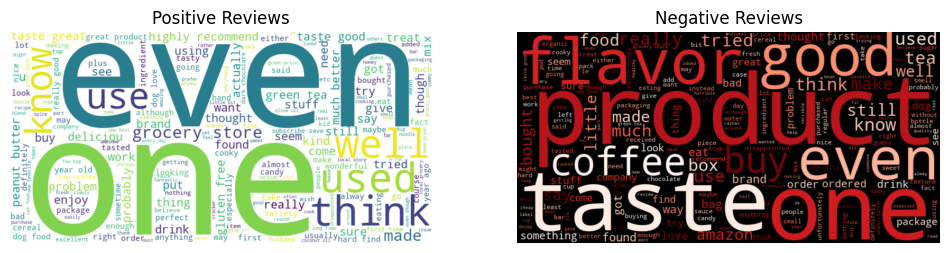

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()

> Word size in a word cloud correlates with word frequency. Higher frequency words appear in larger font sizes, while less frequent words are displayed in smaller fonts.

#### 7. Mapping to Machine Learning Problem
##### 7.1 Train_Test Split
- We are dividing the dataset into training and testing sets in a 70:30 ratio.

In [46]:
y_true = df['Sentiment']

In [47]:
y_true

0         1
1         0
2         1
3         0
4         1
         ..
366324    1
366325    0
366326    1
366327    1
366328    1
Name: Sentiment, Length: 366329, dtype: int64

> Separating the target variable from the features.

In [48]:
df.drop(['Sentiment'],axis=1,inplace=True)

In [49]:
df.head()

,Text,clean_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from collections import Counter
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [51]:
X_train,X_test, y_train, y_test = train_test_split(df, y_true, stratify=y_true, test_size=0.3)

- Distribution of data in Train and Test:

In [52]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (256430, 2)
Number of data points in test data : (109899, 2)


In [53]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.1575127715165932 Class 1:  0.8424872284834067
---------- Distribution of output variable in test data ----------
Class 0:  0.8424917424180384 Class 1:  0.8424917424180384


> The dataset is highly imbalanced. There's a significant difference in the proportion of class 0 and class 1 instances between the training and test sets, which might affect model performance.

##### 7.2 Word to Vector
- Convert the preprocessed text into numerical representations (vectors) using techniques like TF-IDF,or Bag-of-Words.
-  We are using TF-IDF and  Bigram BOW.

##### 7.2.1 TF-IDF

In [54]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])
X_train_tfidf.get_shape()

(256430, 216006)

In [55]:
X_test_tfidf = vectorizer.transform(X_test['clean_text'])

In [56]:
X_test_tfidf.get_shape()

(109899, 216006)

#####  7.2.2 Bag Of Words (BOW)
- Bigram Bag of Words is like looking at pairs of words instead of single words. For example, in the sentence "I love this movie", the bigrams would be "I love", "love this", and "this movie". This helps capture phrases and word order, which can be useful for understanding the context of words.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(ngram_range=(2,2))
X_train_bow = bow_vectorizer.fit_transform(X_train['clean_text'])
X_train_bow.get_shape()

(256430, 3032679)

In [58]:
X_test_bow = bow_vectorizer.transform(X_test['clean_text'])

In [59]:
X_test_bow.get_shape()

(109899, 3032679)

> Displaying sample bi-gram features:

In [60]:
print("Some feature names ", bow_vectorizer.get_feature_names_out())

Some feature names  ['aa add' 'aa amazon' 'aa aroma' ... 'zzzz favoritethis' 'zzzzz large'
 'zzzzzzzzzzfinally good']


#### 7.3 Accuracy Measure
- Binary Confusion Matrix
- Log-Loss

In [61]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

#### 7.4 Machine Learning Model
##### 7.4.1 Random Model
- Random Model predicts randomly between two classes, regardless of input data. Used as a baseline to compare model performance.

Log loss on Test Data using Random Model 0.8868526073666095


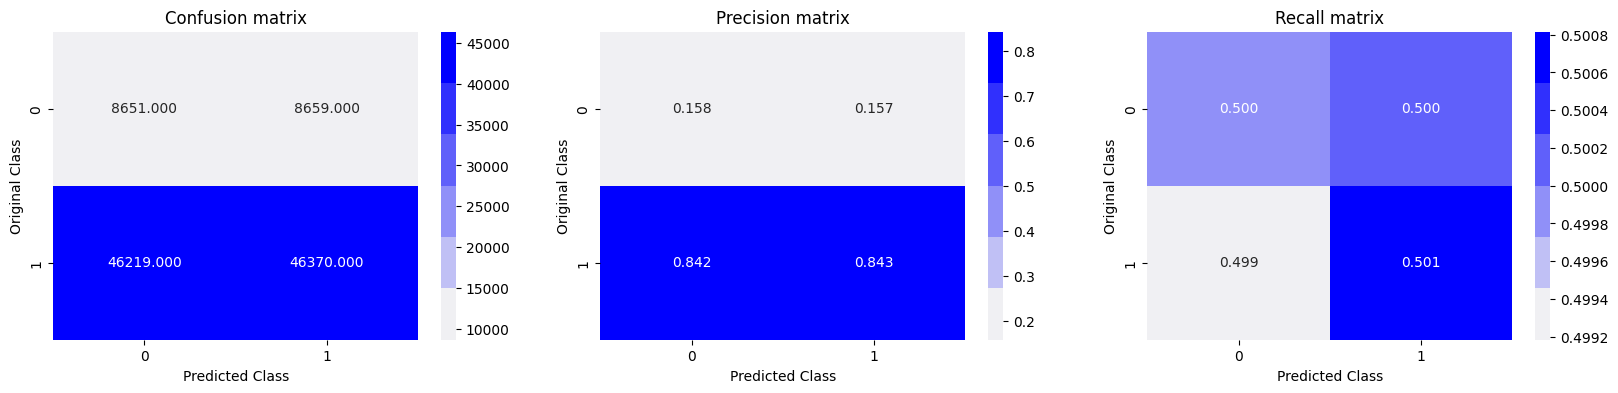

In [62]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

##### 7.4.2 SGD Classifier with Logistic Regression Parameter
- We are employing an SGD classifier with logistic regression loss, assigning five times the weight to the minority class during training to address class imbalance.
  > Employing TF-IDF vectorization. 

For values of alpha =  1e-07 The log loss is: 0.20238448420409508
For values of alpha =  1e-06 The log loss is: 0.18295613902564445
For values of alpha =  1e-05 The log loss is: 0.18243595554110037
For values of alpha =  0.0001 The log loss is: 0.2008888834437893
For values of alpha =  0.001 The log loss is: 0.23795200018264365
For values of alpha =  0.01 The log loss is: 0.26364485389004166
For values of alpha =  0.1 The log loss is: 0.2634071732691241
For values of alpha =  1 The log loss is: 0.2642426823466503
For values of alpha =  10 The log loss is: 0.2642427316034093
For values of alpha =  100 The log loss is: 0.2641517171325664


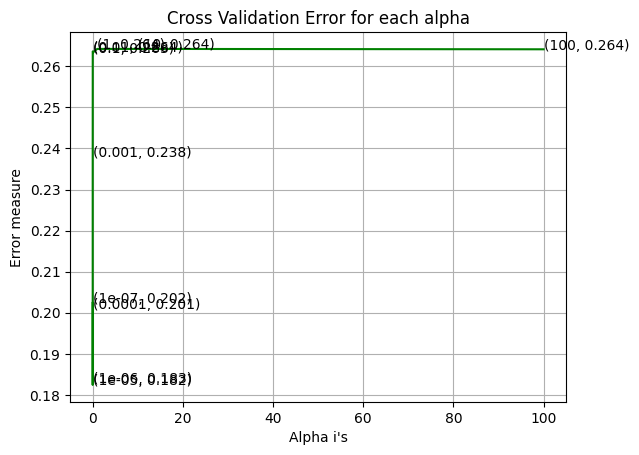

For values of best alpha =  1e-05 The train log loss is: 0.1600551188333584
For values of best alpha =  1e-05 The test log loss is: 0.18243595554110037
Total number of data points : 109899


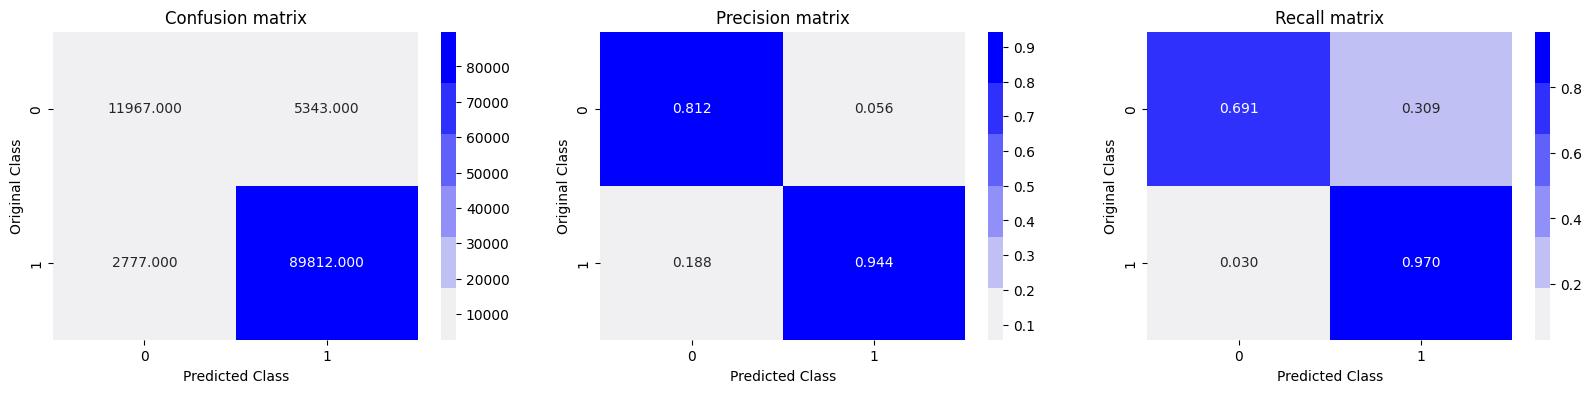

In [63]:
alpha = [10 ** x for x in range(-7, 3)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log_loss',class_weight = {0:5,1:1} ,random_state=42,max_iter=1000)
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    predict_y = sig_clf.predict_proba(X_test_tfidf)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log_loss',class_weight = {0:5,1:1}, random_state=42,max_iter=1000)
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

> Lets try to read Precision and Recall Matrix
- Precision: <b> Column Wise: </b> Of all points predicted to belong to Class 0, only 81.2% were correctly classified as Class 0 (Negative).
- Recall: <b> Row Wise: </b>: Of all points that truly belong to class 0, 69.1% were correctly predicted as belonging to class 0.

> The gap between the train and test log loss is relatively small, indicating a good fit.

> Employing BiGram BOW vectorization.

For values of alpha =  1e-06 The log loss is: 0.20605053806463405
For values of alpha =  1e-05 The log loss is: 0.19638203564456969
For values of alpha =  0.0001 The log loss is: 0.20499037525044905
For values of alpha =  0.001 The log loss is: 0.24553515684681174
For values of alpha =  0.01 The log loss is: 0.31199730842159173
For values of alpha =  0.1 The log loss is: 0.353081120970932
For values of alpha =  1 The log loss is: 0.3647794705321739
For values of alpha =  10 The log loss is: 0.3662090061896731


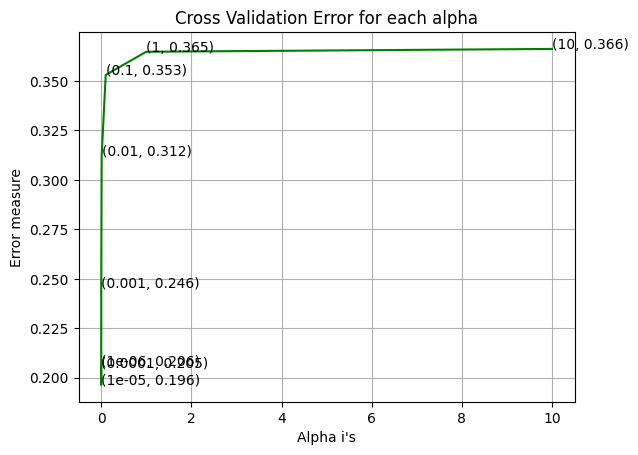

For values of best alpha =  1e-05 The train log loss is: 0.06425510429373313
For values of best alpha =  1e-05 The test log loss is: 0.19638203564456969
Total number of data points : 109899


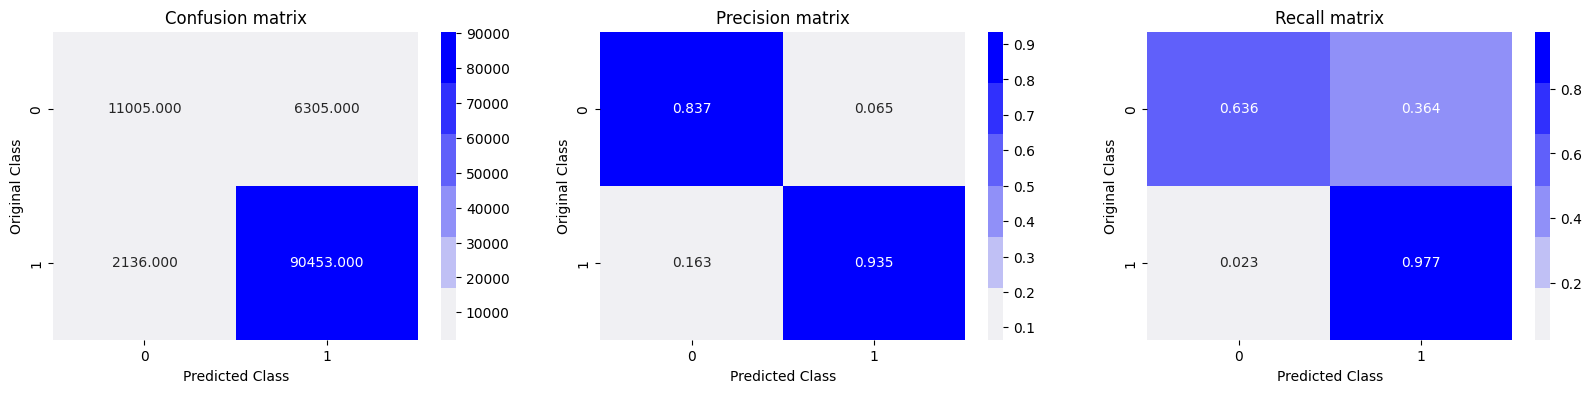

In [64]:
alpha = [10 ** x for x in range(-6, 2)] 
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log_loss',class_weight = {0:5,1:1}, random_state=42,max_iter=1000)
    clf.fit(X_train_bow, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_bow, y_train)
    predict_y = sig_clf.predict_proba(X_test_bow)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log_loss',class_weight={0:5,1:1}, random_state=42,max_iter=1000)
clf.fit(X_train_bow, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_bow, y_train)

predict_y = sig_clf.predict_proba(X_train_bow)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_))
predict_y = sig_clf.predict_proba(X_test_bow)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

- Despite a lower misclassification rate, the significant gap between training and test log loss indicates that the model is overfitting. This suggests that the model is learning the training data too closely and may not generalize well to unseen data.

#### 7.4.3 XGBOOST
##### 7.4.3.1 XGBoost on TFIDF With Class Balance

In [65]:
import xgboost as xgb
# Calculate class weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.03
params['max_depth'] = 4
params['scale_pos_weight'] = scale_pos_weight #scale positive weight
d_train = xgb.DMatrix(X_train_tfidf, label=y_train)
d_test = xgb.DMatrix(X_test_tfidf, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 300, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train_tfidf,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))

C:\Users\hatyy\anaconda3\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-logloss:0.68793	valid-logloss:0.68796
[10]	train-logloss:0.64941	valid-logloss:0.64942
[20]	train-logloss:0.62481	valid-logloss:0.62487
[30]	train-logloss:0.60691	valid-logloss:0.60705
[40]	train-logloss:0.59225	valid-logloss:0.59251
[50]	train-logloss:0.57975	valid-logloss:0.58017
[60]	train-logloss:0.56898	valid-logloss:0.56954
[70]	train-logloss:0.55935	valid-logloss:0.56005
[80]	train-logloss:0.55046	valid-logloss:0.55129
[90]	train-logloss:0.54252	valid-logloss:0.54347
[100]	train-logloss:0.53499	valid-logloss:0.53609
[110]	train-logloss:0.52816	valid-logloss:0.52935
[120]	train-logloss:0.52176	valid-logloss:0.52306
[130]	train-logloss:0.51583	valid-logloss:0.51721
[140]	train-logloss:0.51024	valid-logloss:0.51173
[150]	train-logloss:0.50514	valid-logloss:0.50667
[160]	train-logloss:0.50026	valid-logloss:0.50183
[170]	train-logloss:0.49552	valid-logloss:0.49718
[180]	train-logloss:0.49120	valid-logloss:0.49288
[190]	train-logloss:0.48693	valid-logloss:0.48878
[200]	train

Total number of data points : 109899


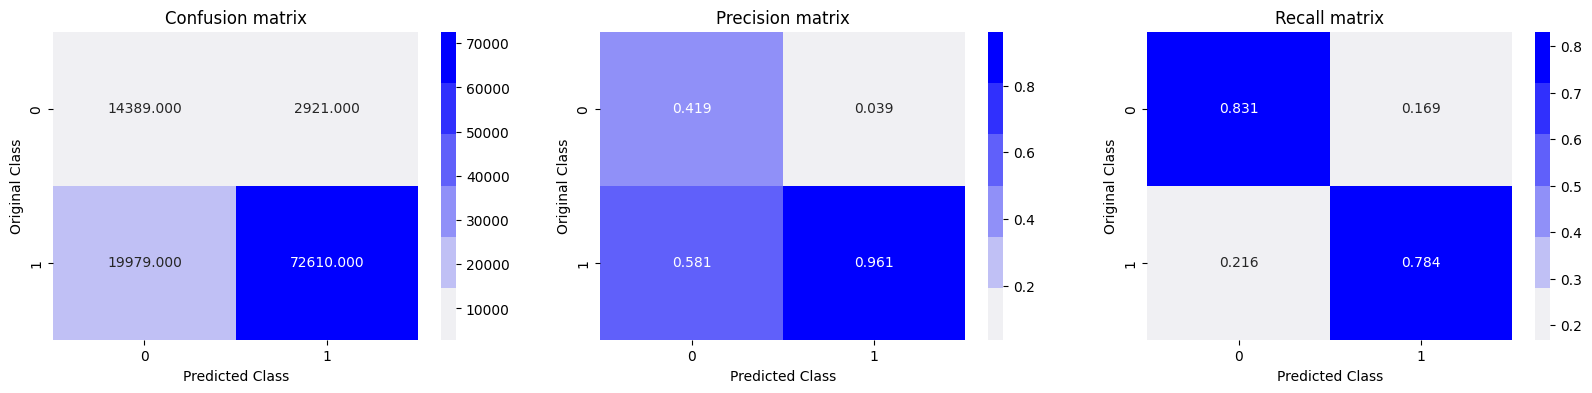

In [66]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

##### 7.4.3.2 XGBoost on TFIDF With Out Class Balance

In [67]:
#without weight balance
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.04
params['max_depth'] = 4
d_train = xgb.DMatrix(X_train_tfidf, label=y_train)
d_test = xgb.DMatrix(X_test_tfidf, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train_tfidf,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))

C:\Users\hatyy\anaconda3\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-logloss:0.43838	valid-logloss:0.43835
[10]	train-logloss:0.41044	valid-logloss:0.41050
[20]	train-logloss:0.39224	valid-logloss:0.39263
[30]	train-logloss:0.37866	valid-logloss:0.37936
[40]	train-logloss:0.36798	valid-logloss:0.36896
[50]	train-logloss:0.35901	valid-logloss:0.36034
[60]	train-logloss:0.35129	valid-logloss:0.35290
[70]	train-logloss:0.34473	valid-logloss:0.34662
[80]	train-logloss:0.33879	valid-logloss:0.34090
[90]	train-logloss:0.33354	valid-logloss:0.33591
[100]	train-logloss:0.32871	valid-logloss:0.33127
[110]	train-logloss:0.32442	valid-logloss:0.32715
[120]	train-logloss:0.32036	valid-logloss:0.32331
[130]	train-logloss:0.31659	valid-logloss:0.31972
[140]	train-logloss:0.31320	valid-logloss:0.31651
[150]	train-logloss:0.30989	valid-logloss:0.31337
[160]	train-logloss:0.30685	valid-logloss:0.31052
[170]	train-logloss:0.30397	valid-logloss:0.30779
[180]	train-logloss:0.30125	valid-logloss:0.30525
[190]	train-logloss:0.29858	valid-logloss:0.30273
[200]	train

Total number of data points : 109899


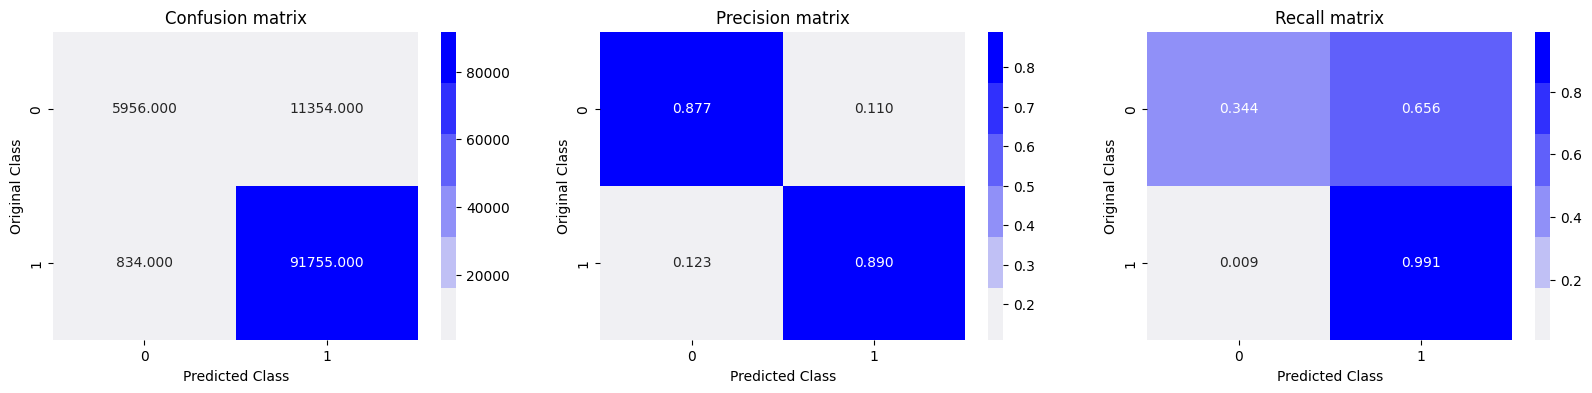

In [68]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

- <b> Recall Matrix: </b>
> <b> Class 0: </b>
- 34.4% of instances that were actually class 0 were correctly predicted as class 0 (true negatives).
- 65.6% of instances that were actually class 0 were incorrectly predicted as class 1 (false negatives).
> <b> Class 1: </b>
- 0.9% of instances that were actually class 1 were incorrectly predicted as class 0 (false positives).
- 99.1% of instances that were actually class 1 were correctly predicted as class 1 (true positives).

- >Overall, the model exhibits very high recall for class 1, meaning it is very good at identifying instances of class 1. However, it has relatively low recall for class 0, indicating that it might miss a significant number of actual class 0 instances.

> <b> Conclusions: </b> Based on the model scores, the SGD Classifier with Logistic Regression Parameter and TF-IDF features, using an alpha value of 0.00001, appears to be the most effective model available to us..